# Grey Model (1,1)

This file contains how to build GM(1,1) step by step based on Mathematical equations.
Any questions please check this document:
https://cran.r-project.org/web/packages/Greymodels/Greymodels.pdf

it explains step by step in R programming.

**Instructions:**

1. Go to `excel_data` folder.
2. Upload `data_exclu_20-21.xlsx` file.

# Load libraries and upload file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
import math

In [2]:
from google.colab import files
uploaded=files.upload()

Saving data_exclu_20-21.xlsx to data_exclu_20-21.xlsx


In [3]:
df=pd.read_excel("data_exclu_20-21.xlsx")
df = df.set_index("Years")
df=df.rename(columns={'New South Wales DT PENALTY': 'NSW', 'Victoria DT PENALTY': 'VIC',
                                      'Queensland DT PENALTY': 'QLD', 'South Australia  DT PENALTY':'SA',
                                      'Western Australia DT PENALTY':'WA', 'Tasmania DT PENALTY': 'TAS',
                                      'Northern Territory DT PENALTY': 'NT','Australian Capital Territory DT PENALTY':'ACT'})

# Build Grey Model (1,1) Step by step follow mathematical equations

In [4]:
# Select form 2004 to 2015, because we want to use this data as training model. Then, we are going to predict from 2016 to 2019.
# Having more original dataset to compare with the predict values, will help us to evaluate the forecasting model with
# the following metrics MAE, MAPE and MSE.

######################  First, let's build GM11 for NSW ######################
df_nsw=df.copy()
x0 = []
t = df_nsw['NSW'][0:12]
for i in t:
  x0.append(i)
#x0

According  to  the  grey  system  theory  on  the  original  sequence  of  first-order accumulation (1-AGO) generated
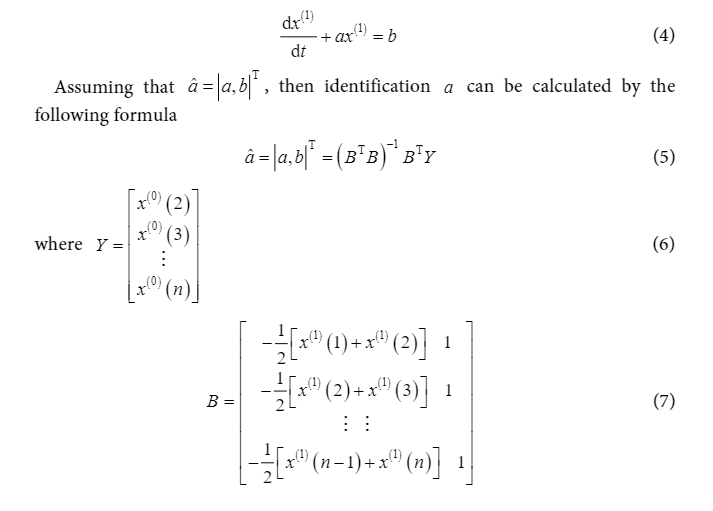

Calculate the accumulative in the list above. Basically, it sums all values, for instance:
- first value= x0
- second value= x0+x1

and so on.

In [5]:
def accumu(lis):
    total = 0
    for x in lis:
        total += x
        yield total


x1 = list(accumu(x0))

#Display results
#x1

Here, it calculates the avg in the accumulation above for each element in x1.

In [6]:
def avg(lis):
  pre = lis[0]
  for x in lis:
      avgVal = (pre + x)/2
      pre = x
      yield avgVal

z1 = [x * -1 for x in list(avg(x1))]

z1 = np.delete(z1 ,0)

#len(z1), z1

Below, it creates a Dataframe called "B" which is a matrix. This dataframe has a column called "0" and its values with z1. Then, it adds a new column called "1" fills with one values. After that, B is transform in an array, Finnaly, it calcualtes the transpose and saves it into a numpy format.

In [7]:
B = pd.DataFrame({'0':z1})
B['1']  = 1

B_ = B.to_numpy()
B_t = B.transpose().to_numpy()


#Please run this if you wantto see the elements on each matrix.
#B_
#B_t

**Observations:**

B_t -> First element are the values in z1 and second are the 1's.

-------------------------------------------------------------
The statement below represent a matrix multiplication operation between B_t with 2 elements, but each element has many elements inside.

A easy way to understand is:
E1_pre=[A][B]
- A -> it's the matix or array with 2 elements with nested lists.
- b-> it's a matrix or array with many list and each list with 2 elements.
-  **dot()** it is the dot product or matrix multiplication operation. In this case for two matrix A and B.

- `np.linalg.inv()` -> it is a function to calculate the inverse of the matrix "**E1_pre**"
- ` E1_pre (as an argument) -> it is a square matrix that we want to calcualte the inverse.

Observation:
Mathematically, it means:

identity = E1_pre*E1

`Observation:` Multiply E1_pre and E1 will return an identity matrix.

In [8]:
E1_pre = B_t.dot(B_)

E1 = np.linalg.inv(E1_pre)

It creates a new array called Xn, by removing an element at index 0 from the array "x0" which is the original data points. Therefore, in the array indices start at 0, so "0" refers  to the first element of the array.

Example:

x0=([1,2,3,4])

xn=np.delete(x0,0)

xn= [2,3,4,5]

In [9]:
Xn = np.delete(x0 ,0)

Here, again it multiplies 2 matrix.

In [10]:
E2 = B_t.dot(Xn)
E2

array([-3.00550233,  2.21919752])

It calcualtes the parameter for the grey model.

In [11]:
parameter = E1.dot(E2)

a = parameter.item(0)
b = parameter.item(1)

#a,b

The time response sequence

In [12]:
pred=[x0[0]]
k=1
while k< len(x0)+ 4:
  pred_val=((x0[0] - (b/a)) * math.exp(-1*a*(k)) + (b/a))
  pred.append(pred_val)
  k+=1
#pred

## Predict the next 4 years from from 2019 to 2022

Nevertheless, it will start from 2004 and finish with 2022.

In [13]:
x_pred = [x0[0]]
k = 1
while k < len(x0)+4:
  x_pred.append(pred[k]-pred[k-1])
  k += 1
#x_pred

In [14]:
#Save the predictions values into a dataframe, which will help to calculate MAE, MSE, MAPE.
pred_result=pd.DataFrame(x_pred, columns=['Predictions'], dtype=float)
pred_result["Years "]=range(2004, 2020)
pred_result=pred_result.set_index("Years ")

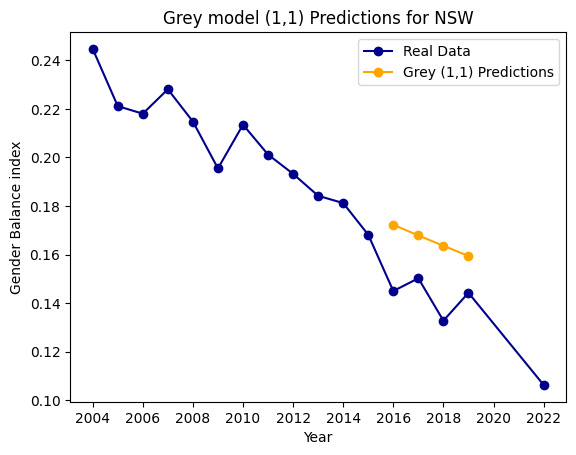

In [15]:
pred_4_years = pred_result.tail(4)
pred_4_years = pred_4_years.tail(4)

plt.plot(df.index, df['NSW'], label='Real Data', color='darkblue', marker='o')
plt.plot(pred_4_years.index, pred_4_years['Predictions'], label='Grey (1,1) Predictions', color='orange', marker='o')
plt.xticks(ticks=np.arange(2004, 2023, 2), labels=np.arange(2004, 2023, 2))
plt.grid(False)
plt.xlabel('Year')
plt.ylabel('Gender Balance index')
plt.title('Grey model (1,1) Predictions for NSW')
plt.legend()
plt.show()

## Evaluate Model

In [16]:
df_real_values=df_nsw.tail(4)



from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
mape = np.mean(np.abs((df_real_values["NSW"].values - pred_4_years['Predictions'])/df_real_values["NSW"].values)) * 100
print("MAPE: ", mape)
mse=sqrt(mean_squared_error(pred_4_years['Predictions'],df_real_values["NSW"]))
print("MSE: ", mse)
mae = mean_absolute_error(df_real_values["NSW"].values, pred_4_years['Predictions'])
print("MAE: ", mae)

MAPE:  26.12745086982575
MSE:  0.03506115615925337
MAE:  0.03241104174665954


## Accuracy Test

In [17]:
x0_mean = np.mean(x0)

S1_sq = np.var(x0)

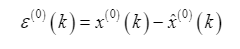

## Residual

In [18]:
def residual():
  for K in range(len(x0)):
    q=(x0[1] - (b/a)) * math.exp(-1*a*(k-1)) + (b/a)
    res_val = x0[K] -(q - q-1)
    yield res_val

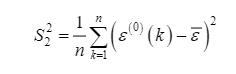

In [19]:
S2_sq = np.var(list(residual()))
S2_sq

0.00044217205814640973

C is the mean square deviation

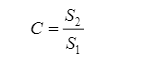

In [20]:
print(math.sqrt(S2_sq)/math.sqrt(S1_sq))

1.0000000000000002


## Residuals Analysis Original Caculation

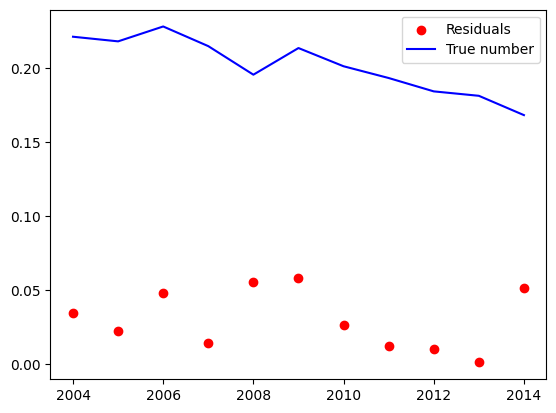

In [21]:
# Residuals Analysis
epsilon = []
i = 1
while i < len(x0):
   epsilon.append(abs((x0[i]-x_pred[i])/x0[i]))
   i += 1
eps_avg = sum(epsilon)/len(epsilon)
eps_avg # pass the test if eps < 0.1

#epsilon, len(epsilon)

epsilon = np.array(epsilon)
#epsilon


epsilon = np.array(epsilon)
output = []
for temp in epsilon:
  output.append(temp)
  t3 = range(2004, 2015)
  output_x0 = x0[1:12]

plt.scatter(t3, output, c = 'red', label = "Residuals")
plt.plot(t3, output_x0, 'b-', label = "True number")
plt.legend(loc = "upper right")
plt.show()

# Grey Model (1,1): All calculation by Australian state/territory

In [22]:
territories = list(df.columns.values)
predictions = pd.DataFrame()

for states in territories:
    select_values = df[states][0:12]
    col_list = select_values.values.tolist()

    def accumu(lis):
        total = 0
        for x in lis:
            total += x
            yield total

    x1 = list(accumu(col_list))
    def avg(lis):
        pre = lis[0]
        for x in lis:
            avgVal = (pre + x)/2
            pre = x
            yield avgVal
    z1 = [x * -1 for x in list(avg(x1))]


    z1 = np.delete(z1, 0)
    B = pd.DataFrame({states:z1})
    B['1']  = 1
    B_ = B.to_numpy()
    B_t = B.transpose().to_numpy()
    E1_pre = B_t.dot(B_)

    E1 = np.linalg.inv(E1_pre)
    Xn = np.delete(col_list ,0)
    E2 = B_t.dot(Xn)

    parameter = E1.dot(E2)

    a = parameter.item(0)
    b = parameter.item(1)

    pred=[col_list[0]]
    k=1
    while k< len(col_list)+ 4:
      pred_val=((col_list[0] - (b/a)) * math.exp(-1*a*(k)) + (b/a))
      pred.append(pred_val)
      k+=1

    x_pred = [col_list[0]]
    k = 1
    while k < len(col_list)+4:
      x_pred.append(pred[k]-pred[k-1])
      k += 1
    predictions[states]=x_pred
    predictions["Years "]=range(2004, 2020)
    predictions=predictions.set_index("Years ")

In [23]:
predic_2016_2019=predictions.iloc[12:]
predic_2016_2019

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
Years,,,,,,,,
2016,0.172278,0.158288,0.133007,0.141583,0.249039,0.122310,0.204147,0.051777
2017,0.167895,0.152667,0.127092,0.137435,0.245907,0.116807,0.207532,0.050051
2018,0.163623,0.147245,0.121439,0.133409,0.242814,0.111551,0.210974,0.048381
2019,0.159460,0.142016,0.116038,0.129501,0.239760,0.106531,0.214473,0.046768


In [24]:
real_data=df.copy()
real_data=real_data.iloc[:-1]
real_data=real_data.tail(4)
real_data

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
Years,,,,,,,,
2016,0.144985,0.177281,0.121504,0.107473,0.195478,0.132431,0.149440,0.022990
2017,0.150242,0.152198,0.108514,0.124367,0.198443,0.094338,0.165622,0.025547
2018,0.132781,0.154283,0.104287,0.117155,0.178801,0.082792,0.128470,0.043407
2019,0.144271,0.132728,0.085508,0.092365,0.173401,0.102625,0.090322,0.046582


## Metrics

In [25]:
territories_au=list(real_data.columns.values)
metrics={}
for states in territories_au:
  mape = np.mean(np.abs((real_data[states].values - predic_2016_2019[states])/real_data[states].values)) * 100
  mse=sqrt(mean_squared_error(predic_2016_2019[states],real_data[states]))
  mae = mean_absolute_error(real_data[states].values, predic_2016_2019[states])
  metrics[states]={"MAPE": mape, "MSE":mse, "MAE":mae}

metric_results= pd.DataFrame.from_dict(metrics)
metric_results

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
MAPE,16.082606,5.645269,19.684796,24.081064,31.347164,17.500425,65.896495,58.248711
MSE,0.023656,0.011144,0.020638,0.027283,0.058358,0.019037,0.082112,0.019065
MAE,0.022744,0.008947,0.019441,0.025142,0.057849,0.016314,0.075818,0.014613


## Plot predictions

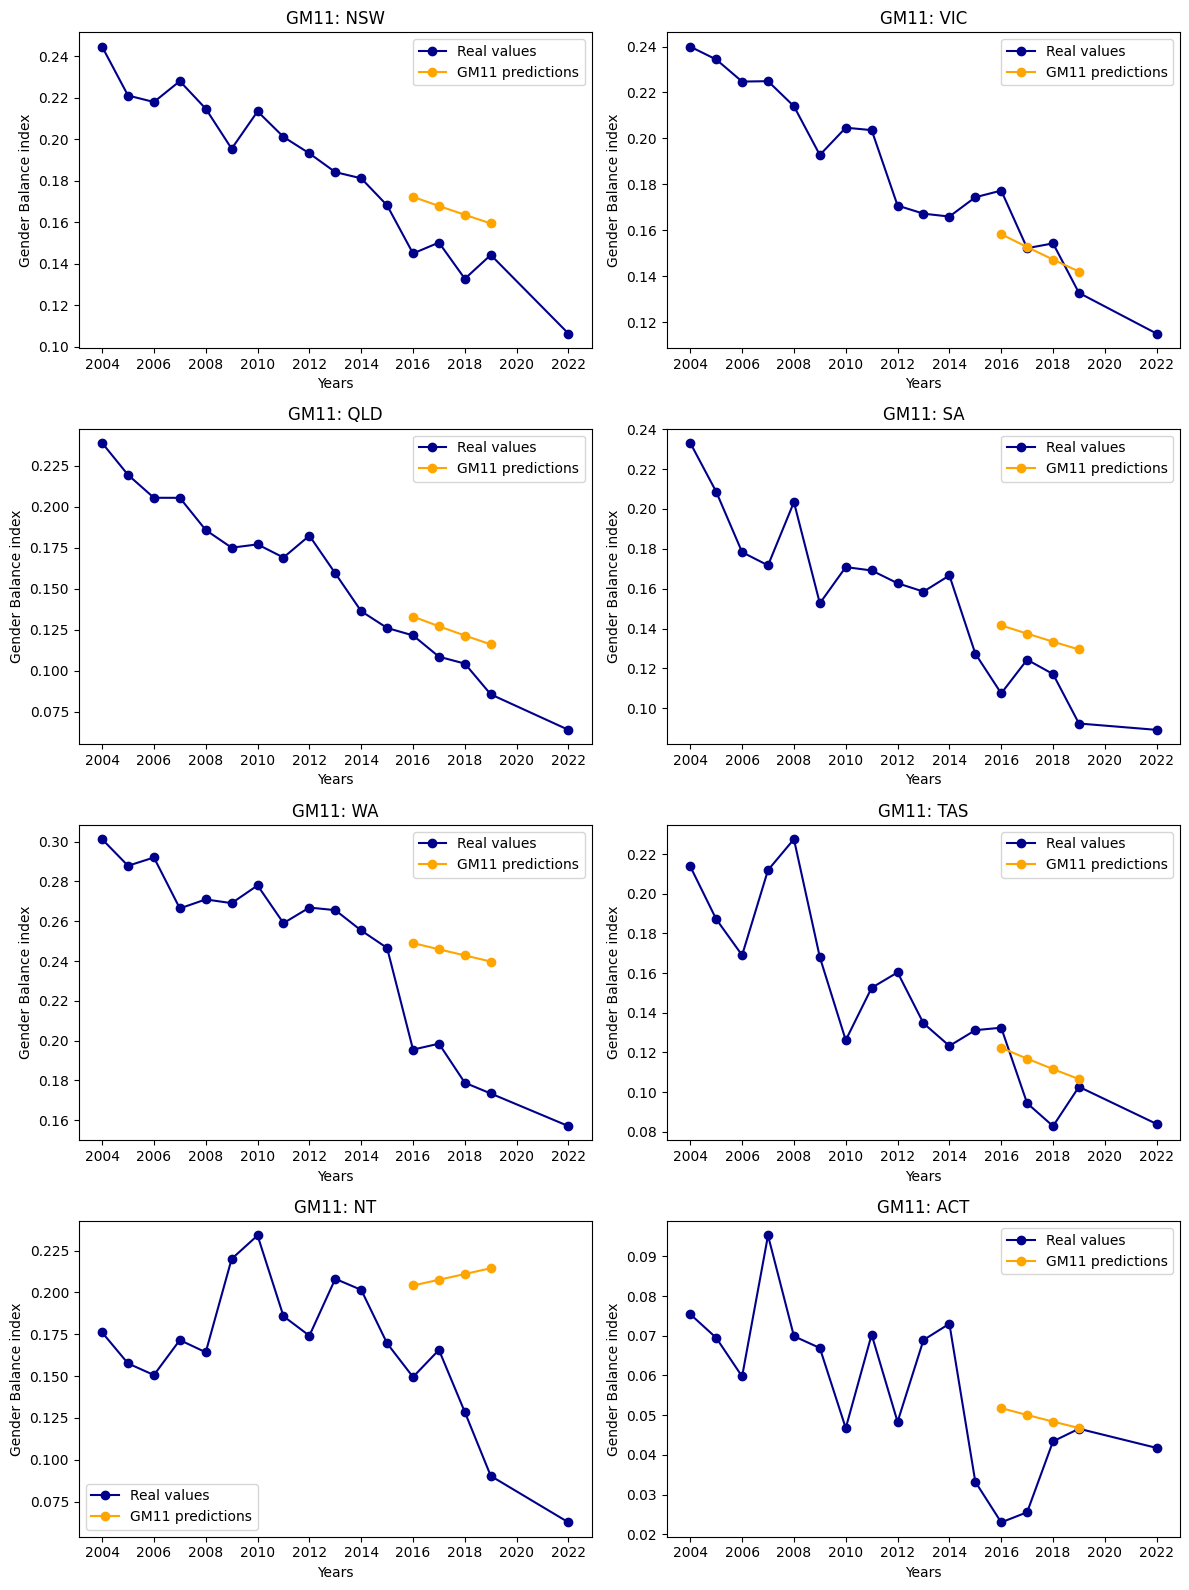

In [26]:

# Define the list of territories for the second dataset
territories_au = list(df.columns.values)  # Replace df_2 with your second dataset

# Create subplots with 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Loop through each territory
for i, state in enumerate(territories_au):
    # Plot real data from the first dataset
    axs[i].plot(df.index, df[state], label='Real values',color='darkblue',  marker='o')
    # Plot predictions from the first dataset
    axs[i].plot(predic_2016_2019.index, predic_2016_2019[state], label='GM11 predictions', color='orange', marker='o')
    # Set x-axis ticks and labels from 2004 to 2022 in steps of 2
    axs[i].set_xticks(ticks=np.arange(2004, 2023, 2))
    axs[i].set_xticklabels(labels=np.arange(2004, 2023, 2))
    # Set labels and title
    axs[i].set_xlabel('Years')
    axs[i].set_ylabel('Gender Balance index')
    axs[i].set_title(f'GM11: {state}')
    # Add legend
    axs[i].legend()
    # Hide grid
    axs[i].grid(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Save Predictions & Metrics

In [27]:
# metric_results.to_csv('grey_model_11_metrics.csv')
# files.download('grey_model_11_metrics.csv')

# predic_2016_2019.to_csv('grey_model_11_predictions.csv')
# files.download('grey_model_11_predictions.csv')